In [1]:
# Notebook 1: 2 Feature Analysis

# this notebook tests the QSVC and classical SVC models using only the top 2 features most correlated with the label.
# the goal is to evaluate model performance with minimal input features.

In [42]:
# load data
import csv
import numpy as np
import pandas as pd

filename = "datasets/Thyroid_Diff.csv"
with open(filename, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    data = [row for row in reader]

data = np.array(data, dtype=object)

# split features from labels
X = data[:, :-1]    # features
y = data[:, -1]     # labels


In [43]:
X[0]

array(['27', 'F', 'No', 'No', 'No', 'Euthyroid',
       'Single nodular goiter-left', 'No', 'Micropapillary', 'Uni-Focal',
       'Low', 'T1a', 'N0', 'M0', 'I', 'Indeterminate'], dtype=object)

In [44]:
# converts string values into integers 
from sklearn.preprocessing import LabelEncoder

# encode X
for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])

X = X.astype(float)

# encode y
y_le = LabelEncoder()
y = y_le.fit_transform(y)

In [45]:
# # convert to pandas so correlation works
# X_df = pd.DataFrame(X)
# y_s = pd.Series(y)

# # compute correlation
# correlations = X_df.apply(lambda col: col.corr(y_s))
# correlations_abs = correlations.abs().sort_values(ascending=False)

# print("\nPEARSON CORRELATIONS (ABS SORTED)")
# print(correlations_abs)

# # select top-k features
# top2 = correlations_abs.head(2).index.tolist()
# top5 = correlations_abs.head(5).index.tolist()
# top10 = correlations_abs.head(10).index.tolist()

# print("\nTop 2 features:", top2)
# print("Top 5 features:", top5)
# print("Top 10 features:", top10)

     


In [46]:
import pandas as pd
import numpy as np

# convert to pandas so correlation works
X_df = pd.DataFrame(X)
y_s = pd.Series(y)

# compute correlation
correlations = X_df.apply(lambda col: col.corr(y_s))
correlations_abs = correlations.abs().sort_values(ascending=False)
print("\nPEARSON CORRELATIONS (ABS SORTED)")
print(correlations_abs)

# select top-k features
top2 = correlations_abs.head(2).index.tolist()
top5 = correlations_abs.head(5).index.tolist()
top10 = correlations_abs.head(10).index.tolist()
print("\nTop 2 features:", top2)
print("Top 5 features:", top5)
print("Top 10 features:", top10)

# ============================================================================
# Generate LaTeX Table
# ============================================================================

# Assuming you have feature names - replace with your actual feature names
# If you don't have feature names, they'll be generated as "Feature 0", "Feature 1", etc.
feature_names = [
    "Age", "Gender", "Smoking", "Radiotherapy History", 
    "Thyroid Function", "Hx", "Physical Examination", 
    "Adenopathy", "T (Tumor)", "Focality", 
    "Response", "Risk", "Stage", "N (Node)", 
    "M (Metastasis)", "Recurred"
]

# If your dataset has different feature names, load them from your data:
# feature_names = X_df.columns.tolist()  # if X_df has column names
# or
# feature_names = data.feature_names  # if using sklearn dataset

def generate_latex_table(correlations_abs, feature_names):
    """Generate LaTeX table for Pearson correlations"""
    
    latex_table = r"""\begin{table}[ht]
\centering
\caption{Ranked Pearson Correlation Coefficients for All Features}
\label{table:pearson}
\resizebox{\columnwidth}{!}{%
\begin{tabular}{c c l c}
\toprule
\textbf{Rank} & \textbf{Feature Index} & \textbf{Feature Name} & \textbf{|Pearson r|} \\
\midrule
"""
    
    # Add each row
    for rank, (feat_idx, corr_value) in enumerate(correlations_abs.items(), start=1):
        # Get feature name (use index if names not available)
        if feature_names and feat_idx < len(feature_names):
            feat_name = feature_names[feat_idx]
        else:
            feat_name = f"Feature {feat_idx}"
        
        latex_table += f"{rank:2d} & {feat_idx:2d} & {feat_name:30s} & {corr_value:.4f} \\\\\n"
    
    # Close table
    latex_table += r"""\bottomrule
\end{tabular}%
}
\end{table}
"""
    
    return latex_table

# Generate and print the LaTeX table
latex_output = generate_latex_table(correlations_abs, feature_names)
print("\n" + "="*80)
print("LATEX TABLE")
print("="*80)
print(latex_output)

# Optionally save to file
with open('pearson_table.tex', 'w') as f:
    f.write(latex_output)
print("\nLaTeX table saved to 'pearson_table.tex'")

# ============================================================================
# Alternative: If you want to get feature names directly from your dataset
# ============================================================================

# If you loaded data from a file with headers:
# data = pd.read_csv('thyroid_data.csv')
# feature_names = data.columns[:-1].tolist()  # all columns except target

# If using the UCI dataset with column names:
# feature_names = data.columns.tolist()

# ============================================================================
# Print summary statistics
# ============================================================================
print("\n" + "="*80)
print("CORRELATION SUMMARY")
print("="*80)
print(f"Number of features: {len(correlations_abs)}")
print(f"Highest correlation: {correlations_abs.iloc[0]:.4f} (Feature {correlations_abs.index[0]})")
print(f"Lowest correlation: {correlations_abs.iloc[-1]:.4f} (Feature {correlations_abs.index[-1]})")
print(f"Mean absolute correlation: {correlations_abs.mean():.4f}")
print(f"Median absolute correlation: {correlations_abs.median():.4f}")


PEARSON CORRELATIONS (ABS SORTED)
10    0.733376
15    0.708957
12    0.632323
11    0.556201
14    0.449137
9     0.383776
13    0.354360
2     0.333243
1     0.328189
0     0.257659
7     0.182530
4     0.174407
3     0.136073
6     0.131801
5     0.067758
8     0.003272
dtype: float64

Top 2 features: [10, 15]
Top 5 features: [10, 15, 12, 11, 14]
Top 10 features: [10, 15, 12, 11, 14, 9, 13, 2, 1, 0]

LATEX TABLE
\begin{table}[ht]
\centering
\caption{Ranked Pearson Correlation Coefficients for All Features}
\label{table:pearson}
\resizebox{\columnwidth}{!}{%
\begin{tabular}{c c l c}
\toprule
\textbf{Rank} & \textbf{Feature Index} & \textbf{Feature Name} & \textbf{|Pearson r|} \\
\midrule
 1 & 10 & Response                       & 0.7334 \\
 2 & 15 & Recurred                       & 0.7090 \\
 3 & 12 & Stage                          & 0.6323 \\
 4 & 11 & Risk                           & 0.5562 \\
 5 & 14 & M (Metastasis)                 & 0.4491 \\
 6 &  9 & Focality                 

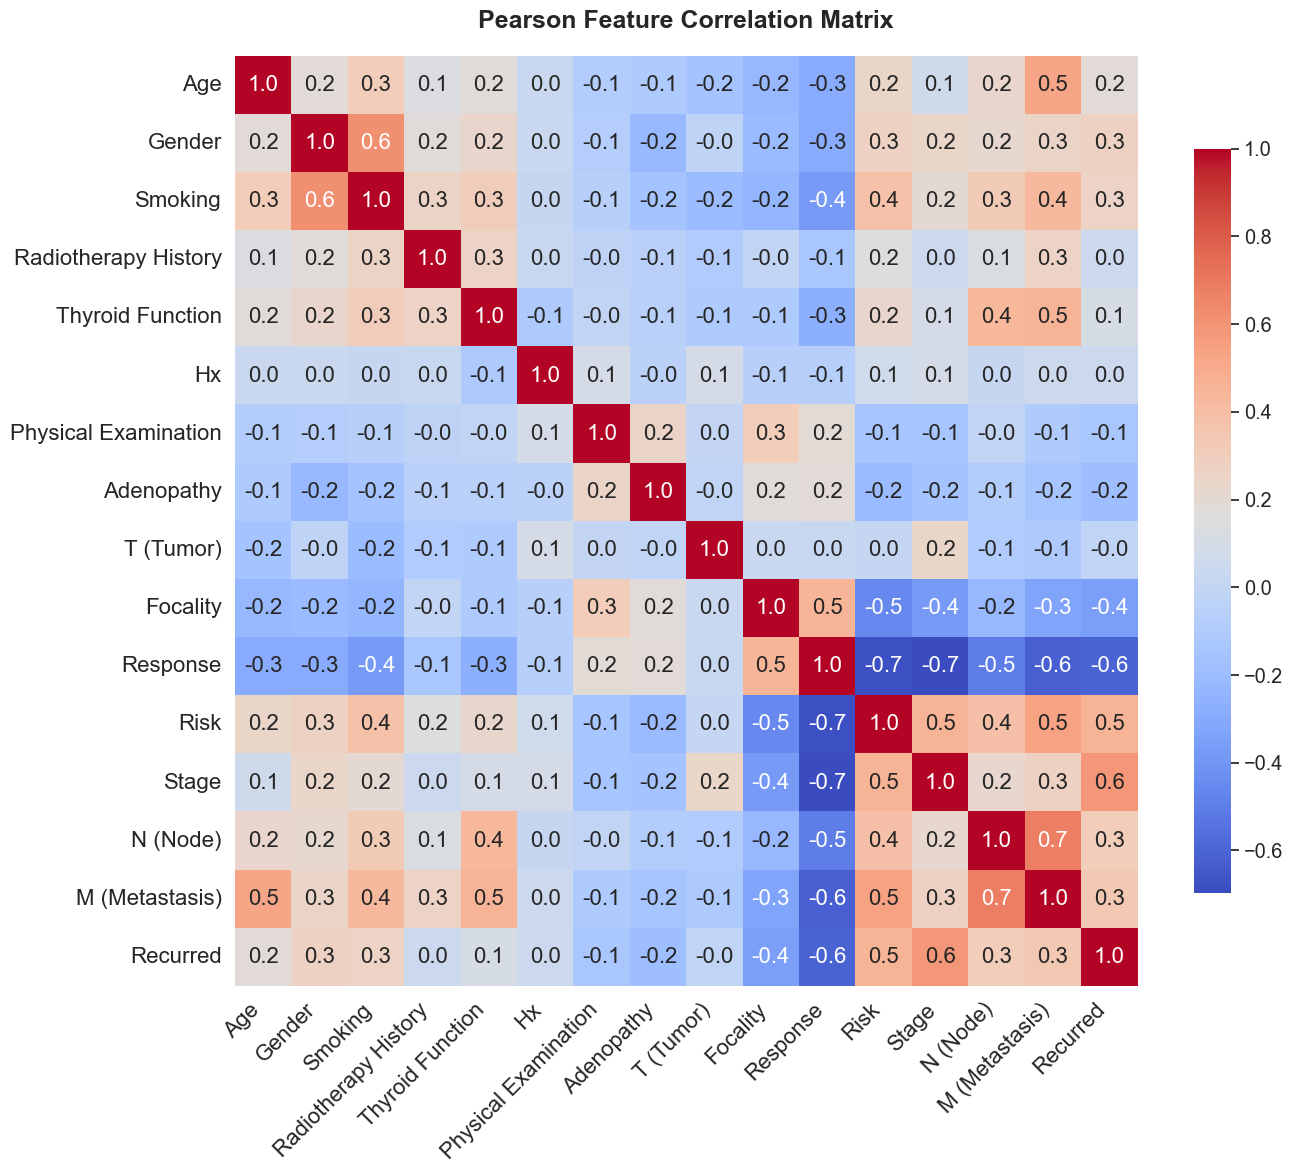

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================================
# Convert numpy array → DataFrame with correct feature names
# ==========================================================

df = pd.DataFrame(X, columns=feature_names)

# Keep only numeric columns (Pearson requires numeric values)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# ==========================================================
# Compute correlation matrix
# ==========================================================

corr_matrix = df_numeric.corr()

# ==========================================================
# Plot heatmap with bigger numbers & bigger font
# ==========================================================

plt.figure(figsize=(14, 12))

sns.set(font_scale=1.3)      # Larger text
sns.set_style("white")

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".1f",               # Two decimal places, readable
    annot_kws={"size": 16},  # Larger numbers inside cells
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(rotation=0, fontsize=16)

plt.title("Pearson Feature Correlation Matrix", fontsize=18, weight='bold', pad=20)
plt.tight_layout()
plt.show()

In [48]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # convert numpy array -> DataFrame
# df = pd.DataFrame(data, columns=header)

# # convert to numeric only (Pearson needs numbers)
# df_numeric = df.apply(pd.to_numeric, errors='coerce')

# plt.figure(figsize=(12, 10))
# corr_matrix = df_numeric.corr()

# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
# plt.title("Feature Correlation Matrix (Pearson)")
# plt.show()


In [49]:
from sklearn.model_selection import train_test_split

# how many features to use
X = X[:, top5]     # <-- CHANGE THIS (top2, top5, top10)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
     

In [50]:
# basic printing and shape checking to confirm dataset size
print(X[0])
print("Shape X:",X.shape)
print("Shape y:", y.shape)

X_new = X[:][0:2]
print("Shape X:",X_new.shape)



[2. 2. 0. 0. 0.]
Shape X: (383, 5)
Shape y: (383,)
Shape X: (2, 5)


In [64]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Global dataframe to store all model results
results_df = pd.DataFrame(columns=[
    "Model", "Accuracy", "Precision", "Sensitivity", "Specificity",
    "F1", "Time (s)", "TN", "FP", "FN", "TP"
])

def evaluate_model(y_true, y_pred, model_name="Model", time=0):
    global results_df  # ensure we update the global df
    
    print(f"\n Evaluation Metrics: {model_name} ")
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    # Print values
    print("Accuracy: ", accuracy)
    print("Precision:", precision)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("F1-Score: ", f1)
    print("Time (s):", time)
    # print("\nConfusion Matrix:")
    # print(cm)
    # print("\nClassification Report:")
    # print(classification_report(y_true, y_pred))

    # ---- Save results to DataFrame ----
    new_row = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "F1": f1,
        "Time (s)": time,
        "TN": TN, "FP": FP, "FN": FN, "TP": TP
    }

    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

    return results_df

In [66]:

# MODEL 1: QSVC + QuantumKernel (main baseline model)
from sklearn.utils import resample
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityStatevectorKernel
from qiskit_machine_learning.algorithms import QSVC

# reduce for speed
# X_train, y_train = resample(X_train, y_train, n_samples=300, random_state=42)
# X_test = X_test[:100]
# y_test_small = y_test[:100]

# quantum feature map
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=1)

quantum_kernel = FidelityStatevectorKernel(feature_map=feature_map)

# this measures how long it takes to train the QSVC model
# DOES NOT AFFECT ACCURACY

import time
qsvc = QSVC(quantum_kernel=quantum_kernel)
start = time.time()
qsvc.fit(X_train, y_train)
total_time = time.time() - start
print("Training took", total_time, "seconds")

y_pred = qsvc.predict(X_test)
# evaluate_model(y_test, y_pred_qsvc, "QSVC")
results = evaluate_model(y_test, y_pred, model_name="QSVC", time=total_time)

Training took 0.5016820430755615 seconds

 Evaluation Metrics: QSVC 
Accuracy:  0.948051948051948
Precision: 1.0
Sensitivity: 0.7894736842105263
Specificity: 1.0
F1-Score:  0.8823529411764706
Time (s): 0.5016820430755615


In [67]:
# MODEL 2: Classical SVC (RBF baseline)
# this is the normal, classical SVC
# this is a good baseline to compare how good the quantum methods are
from sklearn.svm import SVC

svc_rbf = SVC(kernel="rbf")

start = time.time()
svc_rbf.fit(X_train, y_train)
total_time = time.time() - start
print("Training took", total_time, "seconds")

y_pred = svc_rbf.predict(X_test)
results = evaluate_model(y_test, y_pred, model_name="SVC + RBF", time=total_time)


Training took 0.005547046661376953 seconds

 Evaluation Metrics: SVC + (RBF) 
Accuracy:  0.961038961038961
Precision: 1.0
Sensitivity: 0.8421052631578947
Specificity: 1.0
F1-Score:  0.9142857142857143
Time (s): 0.005547046661376953


In [68]:
# MODEL 3: Classical SVC + Quantum Kernel as a callable
# the classical SVC calls the quantum kernel during training

svc_callable = SVC(kernel=quantum_kernel.evaluate)
start = time.time()
svc_callable.fit(X_train, y_train)
total_time = time.time() - start
print("Training took", total_time, "seconds")

y_pred = svc_callable.predict(X_test)
results = evaluate_model(y_test, y_pred, model_name="SVC + FQK + Callable", time=total_time)

Training took 0.5113131999969482 seconds

 Evaluation Metrics: svc_callable 
Accuracy:  0.948051948051948
Precision: 1.0
Sensitivity: 0.7894736842105263
Specificity: 1.0
F1-Score:  0.8823529411764706
Time (s): 0.5113131999969482


In [70]:
# MODEL 4: Classical SVC using precomputed Quantum Kernel
# SVC + QuantumTrainableKernel (Precomputed)
# the quantum kernel matrix is computed BEFORE training

# this is the quantum kernel matrix calculation
K_train = quantum_kernel.evaluate(X_train)
K_test  = quantum_kernel.evaluate(X_test, X_train)

svc_pre = SVC(kernel="precomputed")
start = time.time()
svc_pre.fit(K_train, y_train)
total_time = time.time() - start
print("Training took", total_time, "seconds")

y_pred = svc_pre.predict(K_test)
results = evaluate_model(y_test, y_pred, model_name="SVC + FQK + Precomputed", time=total_time)

Training took 0.000978231430053711 seconds

 Evaluation Metrics: svc_pre 
Accuracy:  0.948051948051948
Precision: 1.0
Sensitivity: 0.7894736842105263
Specificity: 1.0
F1-Score:  0.8823529411764706
Time (s): 0.000978231430053711


In [71]:
# MODEL 5: Trainable Quantum Kernel

# external imports 
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.optimizers import SPSA
from qiskit_machine_learning.algorithms import QSVC
from sklearn.svm import SVC
from sklearn import metrics
from qiskit.visualization import circuit_drawer
import numpy as np

class QKTCallback:
    def __init__(self):
        self._data = [[] for _ in range(5)]

    def callback(self, x0, x1=None, x2=None, x3=None, x4=None):
        self._data[0].append(x0)
        self._data[1].append(x1)
        self._data[2].append(x2)
        self._data[3].append(x3)
        self._data[4].append(x4)

    def get_callback_data(self):
        return self._data

    def clear_callback_data(self):
        self._data = [[] for _ in range(5)]

In [72]:
# SECTION 1 — Feature Map + Trainable Kernel + SPSA + Trainer


num_features = X_train.shape[1]  # e.g., 5 features

# trainable rotation layer: one parameter per qubit
fm0 = QuantumCircuit(num_features)
training_params = ParameterVector("θ", num_features)

for q in range(num_features):
    fm0.ry(training_params[q], q)

# add simple entangling layer (linear chain)
for i in range(num_features - 1):
    fm0.cx(i, i+1)

# static ZZFeatureMap 
fm1 = ZZFeatureMap(num_features, reps=1, entanglement='linear')

# compose trainable + fixed map
fm = fm0.compose(fm1)

print(circuit_drawer(fm))
print(f"Trainable parameters: {training_params}")

# trainable kernel 
from qiskit.primitives import Sampler
sampler = Sampler()

quant_kernel = TrainableFidelityQuantumKernel(
    feature_map=fm,
    training_parameters=training_params
)

# SPSA optimizer
cb_qkt = QKTCallback()
spsa_opt = SPSA(
    maxiter=15,
    callback=cb_qkt.callback,
    learning_rate=0.05,
    perturbation=0.05
)

# kernel trainer 
initial_point = np.random.rand(num_features) * np.pi
qkt = QuantumKernelTrainer(
    quantum_kernel=quant_kernel,
    loss="svc_loss",
    optimizer=spsa_opt,
    initial_point=initial_point
)

     ┌──────────┐                    »
q_0: ┤ Ry(θ[0]) ├──■─────────────────»
     ├──────────┤┌─┴─┐               »
q_1: ┤ Ry(θ[1]) ├┤ X ├──■────────────»
     ├──────────┤└───┘┌─┴─┐          »
q_2: ┤ Ry(θ[2]) ├─────┤ X ├──■───────»
     ├──────────┤     └───┘┌─┴─┐     »
q_3: ┤ Ry(θ[3]) ├──────────┤ X ├──■──»
     ├──────────┤          └───┘┌─┴─┐»
q_4: ┤ Ry(θ[4]) ├───────────────┤ X ├»
     └──────────┘               └───┘»
«     ┌─────────────────────────────────────────┐
«q_0: ┤0                                        ├
«     │                                         │
«q_1: ┤1                                        ├
«     │                                         │
«q_2: ┤2 ZZFeatureMap(x[0],x[1],x[2],x[3],x[4]) ├
«     │                                         │
«q_3: ┤3                                        ├
«     │                                         │
«q_4: ┤4                                        ├
«     └─────────────────────────────────────────┘
Trainable parameters:

/var/folders/76/rnc3b19s2c3d8yj4hy6tjvkw0000gn/T/ipykernel_24009/4258738323.py:28: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [73]:
# SECTION 2 — Subset + Training Trainable Kernel

# use a small subset of training samples to reduce runtime
subset_idx = np.random.choice(len(X_train), size=50, replace=False)
X_subset = X_train[subset_idx]
y_subset = y_train[subset_idx]

print("Training trainable quantum kernel on subset...")
start = time.time()
# qka_results = qkt.fit(X_subset, y_subset)
qka_results = qkt.fit(X_train, y_train)
print("Training QKernel: ", time.time() - start, "seconds")

optimized_kernel = qka_results.quantum_kernel
print(qka_results)

Training trainable quantum kernel on subset...
Training QKernel:  6511.113220691681 seconds
{   'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): -5.902329890513245,
                              ParameterVectorElement(θ[1]): 0.7370069454442589,
                              ParameterVectorElement(θ[2]): -3.42854350311207,
                              ParameterVectorElement(θ[3]): 2.9624591134520153,
                              ParameterVectorElement(θ[4]): 0.8678201963282168},
    'optimal_point': array([-5.90232989,  0.73700695, -3.4285435 ,  2.96245911,  0.8678202 ]),
    'optimal_value': 58.58665296298456,
    'optimizer_evals': 45,
    'optimizer_result': None,
    'optimizer_time': None,
    'quantum_kernel': <qiskit_machine_learning.kernels.trainable_fidelity_quantum_kernel.TrainableFidelityQuantumKernel object at 0x3513b4fa0>}


In [74]:
# SECTION 3 — QSVC + Classical SVC Using the Optimized Kernel
# Quantum SVC
# create a QSVC using the quantum kernel that was optimized earlier
qsvc = QSVC(quantum_kernel=optimized_kernel)

# fit the QSVC model on the small training set
start = time.time()
qsvc.fit(X_subset, y_subset)
total_time = time.time() - start
print("Training took", total_time, "seconds")

y_pred = qsvc.predict(X_test)
results = evaluate_model(y_test, y_pred, model_name="QSVC + TQK", time=total_time)

# labels_test = qsvc.predict(X_test)

# # calculate balanced accuracy on the test set
# accuracy_test = metrics.balanced_accuracy_score(y_true=y_test, y_pred=labels_test)
# print(f"Trainable kernel QSVC test accuracy: {accuracy_test:.3f}")
# y_pred_qsvc = qsvc.predict(X_test)
# evaluate_model(y_test, y_pred_qsvc, "Trainable QK QSVC")
print("\n\n\n")


# Classical SVC + TQK as a callable
# using a small subset of training data to keep runtime reasonable
subset_idx = np.random.choice(len(X_train), size=50, replace=False)
X_train_small = X_train[subset_idx]
y_train_small = y_train[subset_idx]

# precompute kernel matrices
# K_train: kernel values between training samples
# K_test: kernel values between test samples and training samples

# train a classical SVC using the precomputed quantum kernel
adhoc_svc = SVC(kernel=optimized_kernel.evaluate)
start = time.time()
adhoc_svc.fit(X_train_small, y_train_small)
total_time = time.time() - start
print("Training took", total_time, "seconds")

y_pred = adhoc_svc.predict(X_test)
results = evaluate_model(y_test, y_pred, model_name="SVC + TQK + Callable", time=total_time)

# print("Training took (Classical SVC + TQK as a callable): ", time.time() - start, "seconds")

# y_pred_qsvc = adhoc_svc.predict(X_test)
# evaluate_model(y_test, y_pred_qsvc, "(Classical SVC + TQK as a callable)")
print("\n\n\n")


# (Classical SVC + TQK with precompute)
# optional: slower version, but it uses the same subset for consistency
K_train = optimized_kernel.evaluate(X_train)
K_test  = optimized_kernel.evaluate(X_test, X_train)

# train classical SVC on precomputed kernel
svc_pre = SVC(kernel="precomputed")
start = time.time()
svc_pre.fit(K_train, y_train_small)
total_time = time.time() - start
print("Training took", total_time, "seconds")

y_pred = svc_pre.predict(K_test)
results = evaluate_model(y_test, y_pred, model_name="SVC + TQK + Precompute", time=total_time)
# print("Training took (Classical SVC + TQK with precompute): ", time.time() - start, "seconds")

# # evaluate accuracy on test set
# pre_score = svc_pre.score(K_test, y_test)
# print(f"(Classical SVC + TQK with precompute) test score: {pre_score:.3f}")
# evaluate_model(y_test, y_pred_qsvc, "(Classical SVC + TQK with precompute)")
print("\n\n\n")

Training took 3.567462921142578 seconds

 Evaluation Metrics: qsvc TQK 
Accuracy:  0.8311688311688312
Precision: 0.8
Sensitivity: 0.42105263157894735
Specificity: 0.9655172413793104
F1-Score:  0.5517241379310345
Time (s): 3.567462921142578




Training took 3.515866994857788 seconds

 Evaluation Metrics: svc callable TQK 
Accuracy:  0.8571428571428571
Precision: 0.75
Sensitivity: 0.631578947368421
Specificity: 0.9310344827586207
F1-Score:  0.6857142857142857
Time (s): 3.515866994857788






ValueError: Found input variables with inconsistent numbers of samples: [306, 50]

In [78]:
def results_df_to_latex(df, filename="model_results.tex"):
    # Select only the columns you want
    df2 = df[[
        "Model", "Accuracy", "Precision", "Sensitivity",
        "Specificity", "F1", "Time (s)"
    ]]

    latex_content = (
r"\begin{table}[ht]" "\n"
r"\centering" "\n"
r"\caption{Performance Comparison of Quantum and Classical Models}" "\n"
r"\label{tab:model_results}" "\n"
r"\resizebox{0.5\textwidth}{!}{" "\n"
r"\begin{tabular}{|l|c|c|c|c|c|c|}" "\n"
r"\hline" "\n"
r"\textbf{Model} & \textbf{Accuracy} & \textbf{Precision} & "
r"\textbf{Sensitivity} & \textbf{Specificity} & \textbf{F1 Score} & \textbf{Time (s)} \\" "\n"
r"\hline" "\n"
)

    # Add table rows
    for _, row in df2.iterrows():
        latex_content += (
            f"{row['Model']} & "
            f"{row['Accuracy']:.4f} & "
            f"{row['Precision']:.4f} & "
            f"{row['Sensitivity']:.4f} & "
            f"{row['Specificity']:.4f} & "
            f"{row['F1']:.4f} & "
            f"{row['Time (s)']:.4f} \\\\\n"
        )

    latex_content += (
r"\hline" "\n"
r"\end{tabular}" "\n"
r"}" "\n"
r"\end{table}"
)

    # Save to file
    with open(filename, "w") as f:
        f.write(latex_content)

    print(f"LaTeX table saved to {filename}")
    return latex_content
latex_table = results_df_to_latex(results_df)
print(latex_table)

LaTeX table saved to model_results.tex
\begin{table}[ht]
\centering
\caption{Performance Comparison of Quantum and Classical Models}
\label{tab:model_results}
\resizebox{0.5\textwidth}{!}{
\begin{tabular}{|l|c|c|c|c|c|c|}
\hline
\textbf{Model} & \textbf{Accuracy} & \textbf{Precision} & \textbf{Sensitivity} & \textbf{Specificity} & \textbf{F1 Score} & \textbf{Time (s)} \\
\hline
QSVC & 0.9481 & 1.0000 & 0.7895 & 1.0000 & 0.8824 & 0.4927 \\
QSVC & 0.9481 & 1.0000 & 0.7895 & 1.0000 & 0.8824 & 0.5017 \\
SVC + (RBF) & 0.9610 & 1.0000 & 0.8421 & 1.0000 & 0.9143 & 0.0055 \\
svc_callable & 0.9481 & 1.0000 & 0.7895 & 1.0000 & 0.8824 & 0.5113 \\
svc_pre & 0.9481 & 1.0000 & 0.7895 & 1.0000 & 0.8824 & 0.0010 \\
qsvc TQK & 0.8312 & 0.8000 & 0.4211 & 0.9655 & 0.5517 & 3.5675 \\
svc callable TQK & 0.8571 & 0.7500 & 0.6316 & 0.9310 & 0.6857 & 3.5159 \\
\end{tabular}
}
\end{table}


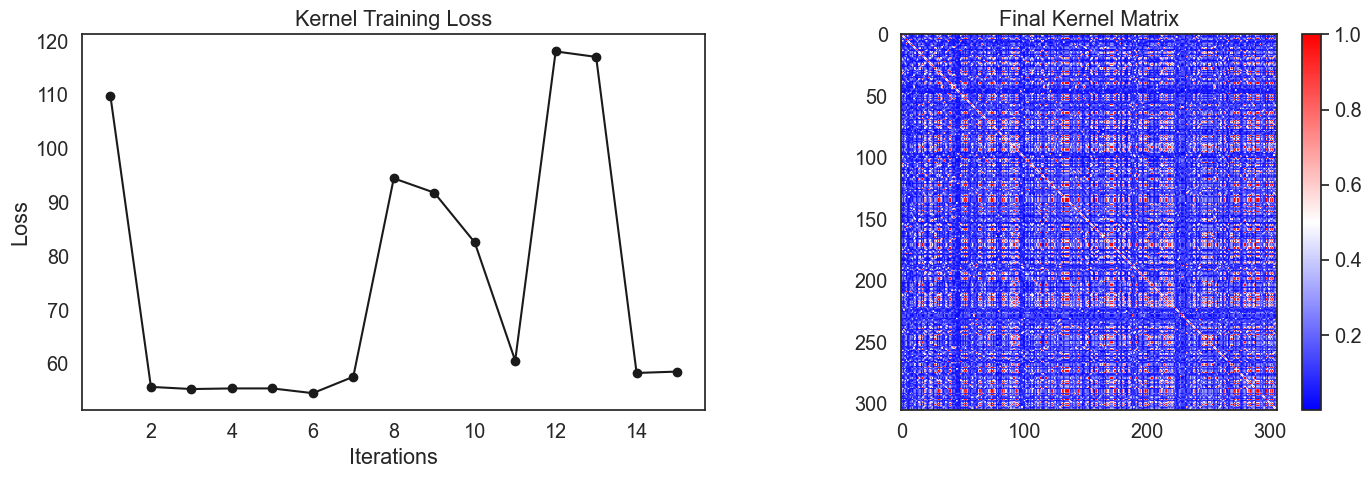

Main Qiskit version:
1.2.4

Installed Qiskit packages:
qiskit 1.2.4
qiskit-machine-learning 0.8.1
qiskit-ibm-runtime 0.30.0
qiskit-algorithms 0.3.0


In [76]:
# SECTION 4 — Visualize the Kernel Training Process

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 1️. plot loss evolution from the callback
plot_data = cb_qkt.get_callback_data()  # callback data from SPSA optimizer

plt.rcParams["font.size"] = 14
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# loss vs iterations
ax[0].plot([i + 1 for i in range(len(plot_data[0]))], np.array(plot_data[2]), c="k", marker="o")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Loss")
ax[0].set_title("Kernel Training Loss")

# kernel matrix heatmap
# K = optimized_kernel.evaluate(X_train)  # or X_train_small
K = K_train
im = ax[1].imshow(K, cmap=matplotlib.colormaps["bwr"])
ax[1].set_title("Final Kernel Matrix")
fig.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)

fig.tight_layout()
plt.show()

# 2️. display Qiskit version and installed packages
import qiskit
import pkg_resources

print("Main Qiskit version:")
print(qiskit.__version__)

print("\nInstalled Qiskit packages:")
for pkg in pkg_resources.working_set:
    if "qiskit" in pkg.key:
        print(pkg.key, pkg.version)
